In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from yfinance.tickers import Tickers
from dataclasses import dataclass

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import *
df = pd.read_csv('SP500.csv')
tickers=[]
for d in df['Symbol']:
  tickers.append(d)
print(tickers)
len(tickers)

['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'BRK.B', 'TSLA', 'UNH', 'JNJ', 'XOM', 'WMT', 'NVDA', 'V', 'JPM', 'PG', 'LLY', 'CVX', 'MA', 'HD', 'META', 'ABBV', 'PFE', 'MRK', 'KO', 'BAC', 'PEP', 'TMO', 'COST', 'ORCL', 'AVGO', 'MCD', 'CSCO', 'DHR', 'ACN', 'TMUS', 'ABT', 'BMY', 'NEE', 'NKE', 'DIS', 'LIN', 'WFC', 'PM', 'TXN', 'VZ', 'AMGN', 'ADBE', 'UPS', 'CMCSA', 'MS', 'SCHW', 'RTX', 'HON', 'COP', 'T', 'NFLX', 'CVS', 'IBM', 'DE', 'QCOM', 'CRM', 'UNP', 'LOW', 'ELV', 'LMT', 'GS', 'CAT', 'SPGI', 'SBUX', 'INTC', 'AXP', 'AMD', 'GILD', 'INTU', 'ADP', 'PLD', 'BLK', 'BA', 'MDT', 'CI', 'AMT', 'ISRG', 'MDLZ', 'GE', 'TJX', 'SYK', 'AMAT', 'CB', 'C', 'MMC', 'PYPL', 'ADI', 'NOC', 'MO', 'EL', 'REGN', 'VRTX', 'NOW', 'DUK', 'PGR', 'BKNG', 'SO', 'EOG', 'TGT', 'SLB', 'ZTS', 'APD', 'BDX', 'MMM', 'HUM', 'MRNA', 'WM', 'ITW', 'GD', 'HCA', 'BSX', 'SHW', 'CSX', 'CL', 'USB', 'FISV', 'EQIX', 'CME', 'AON', 'PNC', 'ETN', 'LRCX', 'CCI', 'ATVI', 'MU', 'MET', 'CHTR', 'OXY', 'ICE', 'EMR', 'NSC', 'DG', 'TFC', 'PXD', 'FCX', 'KLA

503

In [17]:
import pandas_datareader.data as pdr
yf.pdr_override()
sp_ret = pdr.get_data_yahoo(tickers, start="2011-01-01", end="2021-01-01",period='1mo')['Adj Close']
sp_ret.dropna()
print(sp_ret)

[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
- CEG: Data doesn't exist for startDate = 1293858000, endDate = 1609477200
- BF.B: No data found for this date range, symbol may be delisted
- OGN: Data doesn't exist for startDate = 1293858000, endDate = 1609477200
- BRK.B: No data found for this date range, symbol may be delisted
                     A        AAL         AAP        AAPL       ABBV  \
Date                                                                   
2011-01-03   27.204124  10.040198   61.192482   10.033262        NaN   
2011-01-04   26.950785  10.011914   58.146885   10.085625        NaN   
2011-01-05   26.892323  10.464432   58.221615   10.168125        NaN   
2011-01-06   26.944290  10.596414   56.306435   10.159909        NaN   
2011-01-07   27.035231  10.747252   57.810570   10.232667        NaN   
...                ...        ...         ...         ...        ...   
2020-12-24  115.898994  15.660000  154.321442  

In [18]:
sp_ret_monthly=sp_ret.resample('M').last()
sp_ret_monthly.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,27.171644,9.351995,59.735077,10.330087,NaN,29.830349,9.800000,16.888672,9.805556,41.096294,...,82.861069,15.903140,50.325890,32.708527,NaN,26.837620,52.433247,38.900002,19.720886,NaN
2011-02-28,27.334032,8.117003,58.557953,10.752946,NaN,31.622038,12.470000,17.988157,10.055556,41.104279,...,87.562164,16.152796,53.632347,34.450901,NaN,28.886597,55.251659,37.320000,19.544825,NaN
2011-03-31,29.087881,8.211277,61.361259,10.609863,NaN,32.998356,14.530000,18.343431,11.021111,43.890873,...,90.575172,16.293055,52.754467,34.148323,NaN,29.489246,53.647476,39.240002,19.293825,NaN
2011-04-30,32.420189,8.569520,61.211628,10.659180,NaN,33.899227,17.379999,19.646416,11.555556,45.986122,...,105.174843,16.593138,55.168636,34.665295,NaN,30.941498,57.830788,39.290001,20.448435,NaN
2011-05-31,32.394207,8.578947,58.069710,10.589164,NaN,34.477825,18.780001,19.725697,11.243333,46.195400,...,104.724533,16.872761,52.637466,36.225460,NaN,31.910587,60.055382,44.450001,19.946449,NaN


In [19]:
index=pdr.get_data_yahoo('^GSPC',start="2011-01-01", end="2021-01-01")['Adj Close']
index.head()

[*********************100%***********************]  1 of 1 completed


Date
2011-01-03    1271.869995
2011-01-04    1270.199951
2011-01-05    1276.560059
2011-01-06    1273.849976
2011-01-07    1271.500000
Name: Adj Close, dtype: float64

In [21]:
index_monthly=index.resample('M').last()
index_monthly.head()

Date
2011-01-31    1286.119995
2011-02-28    1327.219971
2011-03-31    1325.829956
2011-04-30    1363.609985
2011-05-31    1345.199951
Freq: M, Name: Adj Close, dtype: float64

In [25]:
us_bond = pd.read_csv('ustreasury.csv')
us_bond.head()

,DATE,IRLTLT01GBM156N
0,2011-01-01,3.7273
1,2011-02-01,3.8799
2,2011-03-01,3.7386
3,2011-04-01,3.7619
4,2011-05-01,3.5053


In [28]:
z=np.log(us_bond['IRLTLT01GBM156N']/us_bond['IRLTLT01GBM156N'].shift(1))
z.dropna()
date= us_bond['DATE']
us_bond_ret=z.to_frame()
us_bond_ret['DATE']=date
us_bond_ret.head()
us_bond_ret['DATE'] = pd.to_datetime(us_bond_ret['DATE'])
us_bond_ret.set_index('DATE', inplace=True)
us_bond_ret=us_bond_ret.resample('M').last()
us_bond_ret.columns.values[0]="US10Y"
us_bond_ret.head()

,US10Y
DATE,
2011-01-31,NaN
2011-02-28,0.040125
2011-03-31,-0.037098
2011-04-30,0.006213
2011-05-31,-0.070648


In [29]:
sp_ret = np.log(sp_ret_monthly/sp_ret_monthly.shift(1))
sp_ret = sp_ret[1:]
sp_ret.fillna(0,inplace=True)
print(sp_ret)



                   A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2011-02-28  0.005959 -0.141629 -0.019902  0.040119  0.000000  0.058328   
2011-03-31  0.062189  0.011547  0.046762 -0.013396  0.000000  0.042603   
2011-04-30  0.108460  0.042703 -0.002442  0.004637  0.000000  0.026934   
2011-05-31 -0.000802  0.001099 -0.052693 -0.006590  0.000000  0.016924   
2011-06-30  0.024561 -0.021100 -0.058871 -0.035586  0.000000  0.004357   
...              ...       ...       ...       ...       ...       ...   
2020-08-31  0.041582  0.160043  0.040273  0.196035  0.009020 -0.027951   
2020-09-30  0.005165 -0.060002 -0.016523 -0.108172 -0.089283 -0.001134   
2020-10-31  0.013130 -0.085755 -0.041365 -0.061888 -0.015314 -0.008809   
2020-11-30  0.135464  0.225269  0.002848  0.091205  0.206125  0.074875   
2020-12-31  0.013510  0.109809  0.065857  0.108472  0.024277 -0.053281   

                ABMD       ABT      A

In [30]:
index_ret=np.log(index_monthly/index_monthly.shift(1))

index_ret=index_ret.to_frame()
index_ret.columns.values[0]="SP500"
index_ret.head()



,SP500
Date,
2011-01-31,NaN
2011-02-28,0.031457
2011-03-31,-0.001048
2011-04-30,0.028097
2011-05-31,-0.013593


In [33]:
#beta= covariance(ri,rm-rf)/variance(ri)
#rolling statistics in ols for calculating beta

risk_premium=index_ret['SP500']-us_bond_ret['US10Y']
risk_premium.dropna(inplace=True)
print(risk_premium)



2011-02-28   -0.008669
2011-03-31    0.036050
2011-04-30    0.021884
2011-05-31    0.057055
2011-06-30    0.007848
                ...   
2020-08-31   -0.192733
2020-09-30   -0.044791
2020-10-31   -0.141515
2020-11-30   -0.124523
2020-12-31    0.210256
Freq: M, Length: 119, dtype: float64


In [34]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=71c68c2997ea529d3c2bff902b84c24448e8888d44ce71256ff2ff2203b3fadf
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [49]:
from sklearn.linear_model import LinearRegression
X = risk_premium
all_betas=[]
for i in range (503):
  Y = sp_ret[tickers[i]]
  N = 11
  observations = len(X)
  betas = np.full(observations, np.nan)
  for i in range((observations-N)):
      regressor = LinearRegression()
      regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
        
      betas[i+N]  = regressor.coef_[0]
  all_betas.append(betas)
print(all_betas)
len(all_betas)



[array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, -0.23778505, -0.69021947, -0.77158339, -0.82384208,
       -0.83786782, -0.94060515, -0.78122075, -0.76883391, -0.62889558,
       -0.07124789,  0.15688193,  0.35373909,  0.54242559,  0.64160211,
        0.61006547,  0.55734628,  0.43812925,  0.50675214,  0.46052054,
        0.25150582,  0.245659  ,  0.31998333,  0.3317906 ,  0.31359566,
        0.24387328,  0.25331752,  0.33435373,  0.50775917,  0.53714697,
        0.21701002,  0.27715088,  0.72980092,  0.71935414,  0.59311053,
        0.69761405,  0.41404451,  0.09830162, -0.03087436,  0.1021457 ,
        0.1379253 ,  0.06602653,  0.1414391 ,  0.13769755,  0.10070248,
        0.09380479,  0.08945616,  0.03863531,  0.13994651, -0.07131084,
        0.04377241,  0.08731874,  0.12630006,  0.41317797,  0.30667836,
        0.33155684,  0.28620056,  0.16898735,  0.0907513 ,  0.0

503

In [51]:
new_df = pd.DataFrame()
for i in range(len(all_betas)):
  new_df.insert(loc=i,column=tickers[i],value=all_betas[i])
new_df=new_df.T
new_df.head()


,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.065662,0.062436,0.014320,-0.050278,0.015636,-0.028746,0.025667,0.094341,0.090611,0.123365
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013036,0.115379,0.072817,0.029198,0.008252,-0.021655,0.004390,0.038323,0.040614,0.046990
GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.113301,0.050539,0.037021,0.071016,0.078337,0.045207,0.084176,0.042634,0.022593,0.013967
GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.113097,0.051534,0.038716,0.073299,0.080358,0.051049,0.089802,0.047188,0.027725,0.021250
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.032772,0.242111,0.163250,0.120002,0.164246,0.187585,0.210735,0.229813,0.220183,0.208033


In [55]:
df_new = pd.DataFrame()
df_new2=pd.DataFrame()
for i in range(119):
  df_new.insert(i,str(i),new_df[new_df[new_df.columns[i]]>new_df[new_df.columns[i]].quantile(0.75)][i])
  df_new2.insert(i,str(i),new_df[new_df[new_df.columns[i]]<new_df[new_df.columns[i]].quantile(0.25)][i])
 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [56]:
print(df_new)
print(df_new2)
df_new.to_csv('best.csv')
df_new2.to_csv('worst.csv')

       0   1   2   3   4   5   6   7   8   9  ...       109       110  \
WMT  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.117448       NaN   
NVDA NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.045453       NaN   
HD   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.178388  0.288259   
CSCO NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
AMGN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.116654  0.212695   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...       ...   
MHK  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
GNRC NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.112414       NaN   
LUMN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
ALK  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
NWL  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.218430  0.195775   

           111       112       113       114       115       116       117  \
WMT        NaN       NaN       NaN       NaN 

In [57]:
indexNamesArr = df_new.index.values
print(indexNamesArr)
indexNamesArr2 = df_new2.index.values
print(indexNamesArr2)

['WMT' 'NVDA' 'HD' 'CSCO' 'AMGN' 'ADBE' 'HON' 'CVS' 'DE' 'LOW' 'CAT' 'AMD'
 'INTU' 'BLK' 'ADI' 'REGN' 'EOG' 'WM' 'ITW' 'GD' 'SHW' 'ETN' 'MU' 'OXY'
 'EMR' 'DG' 'FCX' 'GM' 'PSA' 'ORLY' 'F' 'MAR' 'SNPS' 'CNC' 'APH' 'VLO' 'A'
 'EW' 'FDX' 'RSG' 'ECL' 'LHX' 'MCHP' 'TT' 'FTNT' 'O' 'NUE' 'PH' 'NEM'
 'PCAR' 'YUM' 'COF' 'ALL' 'AME' 'SBAC' 'DHI' 'GWW' 'ROK' 'VRSK' 'GLW'
 'TROW' 'LYB' 'WBD' 'GPC' 'URI' 'VMC' 'EFX' 'AEE' 'DAL' 'MLM' 'PWR' 'ANSS'
 'EXR' 'FRC' 'VRSN' 'MOH' 'CF' 'ROL' 'DOV' 'HOLX' 'BBY' 'J' 'MPWR' 'EXPD'
 'CINF' 'BRO' 'MOS' 'AVY' 'NVR' 'ALGN' 'RCL' 'UAL' 'PTC' 'TER' 'TRMB'
 'AKAM' 'LKQ' 'EXPE' 'ZBRA' 'TYL' 'IP' 'SNA' 'PKG' 'GL' 'SWK' 'CE' 'MAS'
 'STX' 'JNPR' 'MKTX' 'PHM' 'CCL' 'HII' 'AOS' 'FFIV' 'AAP' 'AAL' 'PNW'
 'HAS' 'WHR' 'FBHS' 'MHK' 'GNRC' 'LUMN' 'ALK' 'NWL']
['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'UNH' 'XOM' 'CVX' 'KO' 'COST' 'ORCL' 'AVGO'
 'ACN' 'TMUS' 'ABT' 'BMY' 'NKE' 'DIS' 'LIN' 'CMCSA' 'SCHW' 'RTX' 'COP' 'T'
 'NFLX' 'IBM' 'CRM' 'ELV' 'INTC' 'PLD' 'ISRG' 'TJX' 'VRTX' 'APD' 'BSX'
 'U

In [60]:
df22 = pd.DataFrame()
for i in range(len(indexNamesArr)):
  df22.insert(i,column=indexNamesArr[i],value=sp_ret[indexNamesArr[i]])
df22=df22.T
df33 = pd.DataFrame()
for i in range(len(indexNamesArr2)):
  df33.insert(i,column=indexNamesArr2[i],value=sp_ret[indexNamesArr2[i]])
df33=df33.T
df33.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Date,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
AAPL,0.040119,-0.013396,0.004637,-0.006590,-0.035586,0.151248,-0.014575,-0.009163,0.059705,-0.057400,...,-0.072314,0.144424,0.081667,0.137486,0.152834,0.196035,-0.108172,-0.061888,0.091205,0.108472
GOOG,0.021488,-0.044401,-0.075483,-0.028107,-0.043739,0.175773,-0.109715,-0.049101,0.140342,0.011325,...,-0.141330,0.148272,0.057807,-0.010772,0.047893,0.097101,-0.106151,0.098059,0.082685,-0.005045
GOOGL,0.021488,-0.044401,-0.075483,-0.028107,-0.043739,0.175773,-0.109715,-0.049101,0.140343,0.011325,...,-0.142010,0.147558,0.062476,-0.010850,0.048117,0.090892,-0.106027,0.097757,0.082105,-0.001004
AMZN,0.021288,0.038712,0.083466,0.004484,0.038890,0.084498,-0.033310,0.004635,-0.012659,-0.104679,...,0.034421,0.238150,-0.012867,0.121834,0.137249,0.086601,-0.091653,-0.036409,0.042523,0.027672
UNH,0.036594,0.062586,0.085406,-0.005704,0.055640,-0.038539,-0.043445,-0.026443,0.039746,0.016123,...,-0.017807,0.159384,0.041458,-0.028717,0.026200,0.031758,0.001613,-0.021495,0.097352,0.045343


In [61]:
df_bestmonths_cumsum = pd.DataFrame()
for i in range(119):
  df_bestmonths_cumsum.insert(i,column=str(i),value=df22[df22.columns[i]].cumsum())
 
print(df_bestmonths_cumsum)

             0         1         2         3         4          5         6  \
WMT  -0.075742  0.008330  0.054764  0.010951 -0.038396  -0.008124  0.016273   
NVDA -0.129856 -0.196665  0.134890  0.012949 -0.267295  -0.150116 -0.022051   
HD   -0.110997 -0.200864  0.137316 -0.010748 -0.261461  -0.186381 -0.060058   
CSCO -0.241628 -0.276378  0.158661 -0.052712 -0.334928  -0.159791 -0.079022   
AMGN -0.312139 -0.235906  0.220330  0.010176 -0.371773  -0.224387 -0.060865   
...        ...       ...       ...       ...       ...        ...       ...   
MHK   1.181858  1.697899  2.821386 -0.878373 -4.537847 -10.163948 -5.246068   
GNRC  1.389036  1.799488  2.847172 -1.001393 -4.485468 -10.208751 -5.140761   
LUMN  1.356902  1.808433  2.828466 -0.943976 -4.534371 -10.294437 -5.166971   
ALK   1.360441  1.873077  2.866369 -0.918939 -4.520842 -10.407847 -5.224033   
NWL   1.367665  1.862160  2.862704 -0.982187 -4.641859 -10.424461 -5.332638   

              7          8         9  ...        10

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [62]:
df_bestmonths_cumsum.iloc[[-1]]
df_bestmonths_cumsum.iloc[[-1]].T.cumsum()

,NWL
0,1.367665
1,3.229824
2,6.092528
3,5.110341
4,0.468482
...,...
114,155.930339
115,154.130299
116,154.174766
117,170.451399


In [63]:
df_worstmonths_cumsum = pd.DataFrame()
for i in range(119):
  df_worstmonths_cumsum.insert(i,column=str(i),value=df33[df33.columns[i]].cumsum())
 
print(df_worstmonths_cumsum)

              0         1         2         3         4         5          6  \
AAPL   0.040119 -0.013396  0.004637 -0.006590 -0.035586  0.151248  -0.014575   
GOOG   0.061607 -0.057797 -0.070845 -0.034697 -0.079325  0.327022  -0.124290   
GOOGL  0.083095 -0.102198 -0.146328 -0.062804 -0.123064  0.502795  -0.234006   
AMZN   0.104382 -0.063486 -0.062862 -0.058320 -0.084174  0.587293  -0.267316   
UNH    0.140976 -0.000900  0.022544 -0.064023 -0.028533  0.548755  -0.310760   
...         ...       ...       ...       ...       ...       ...        ...   
ZION   7.079363  2.150714  5.920398 -0.912849  0.137622 -1.522171 -11.087980   
DVA    7.151447  2.225227  5.950124 -0.959796  0.167625 -1.558261 -11.214933   
DXC    7.049605  2.241864  5.995262 -1.205104  0.123258 -1.631478 -11.355290   
VNO    7.107387  2.177361  6.095030 -1.180387  0.068953 -1.627515 -11.431907   
TECH   7.150297  2.175965  6.177059 -1.129375  0.091639 -1.722837 -11.472992   

              7          8         9  .

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [64]:
df_worstmonths_cumsum.iloc[[-1]]
df_worstmonths_cumsum.iloc[[-1]].T.cumsum()

,TECH
0,7.150297
1,9.326262
2,15.503321
3,14.373946
4,14.465585
...,...
114,148.181825
115,142.929667
116,140.698729
117,155.087651


In [96]:
spread=df_bestmonths_cumsum.mean()-df_worstmonths_cumsum.mean()
spread.cumsum()
# index_ret['Date']
indexNamesArrDate = index_ret.index.values
SP2=spread.T
SP3=SP2.to_frame()
indexNamesArrDate=np.delete(indexNamesArrDate,0)
SP3.insert(1,'Dates',indexNamesArrDate)
SP3['Dates'] = pd.to_datetime(SP3['Dates'])
SP3.set_index('Dates', inplace=True)
SP3.head()


,0
Dates,
2011-02-28,-2.747532
2011-03-31,-0.141371
2011-04-30,-1.195472
2011-05-31,-0.347636
2011-06-30,-2.376659


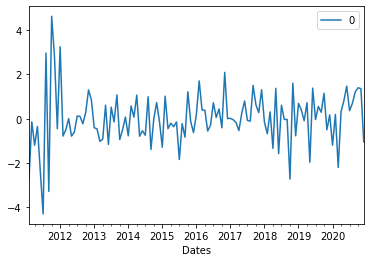

In [97]:
SP3.plot()

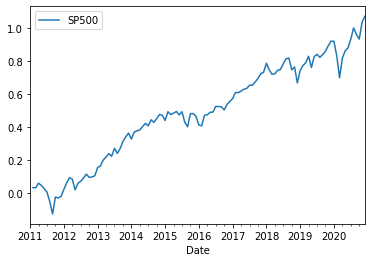

In [67]:
index_ret.cumsum().plot()

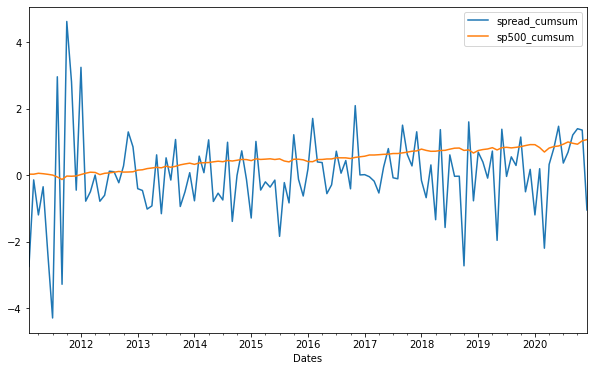

In [112]:
strategy=pd.DataFrame()
strategy.insert(0,'spread_cumsum',SP3[0])
x=index_ret.cumsum()
x=x.iloc[1: , :]
strategy.insert(1,'sp500_cumsum',x)
strategy[['spread_cumsum','sp500_cumsum']].plot(figsize=(10,6))


In [113]:
spread.describe()

count    119.000000
mean       0.015826
std        1.225658
min       -4.298184
25%       -0.548012
50%       -0.029815
75%        0.659394
max        4.628567
dtype: float64